In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


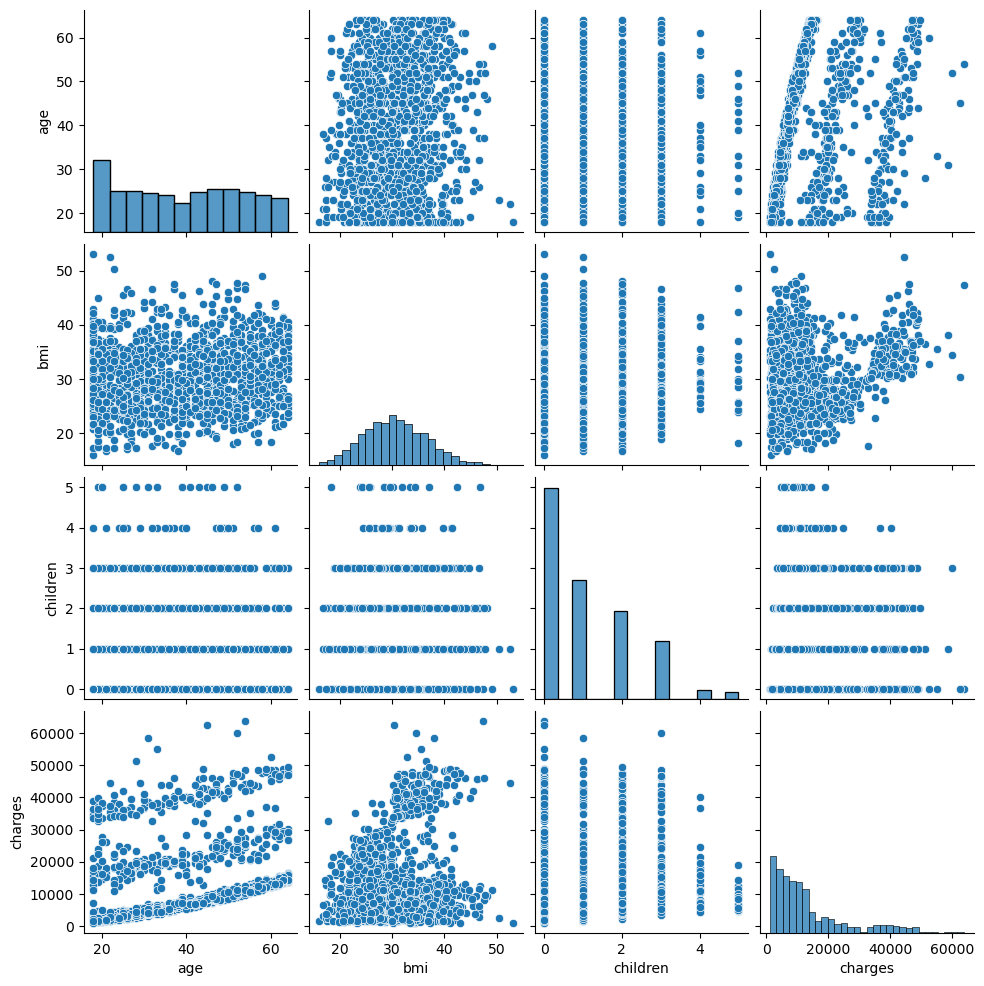

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='age'>

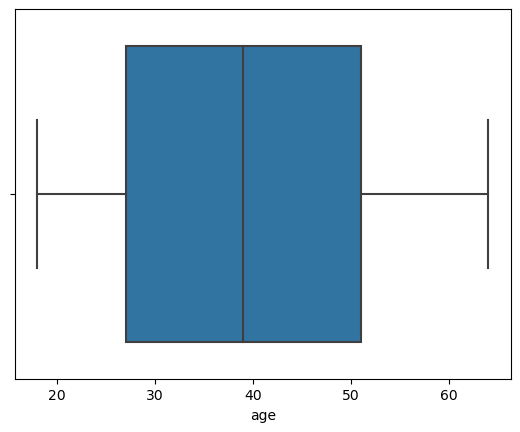

In [10]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='bmi'>

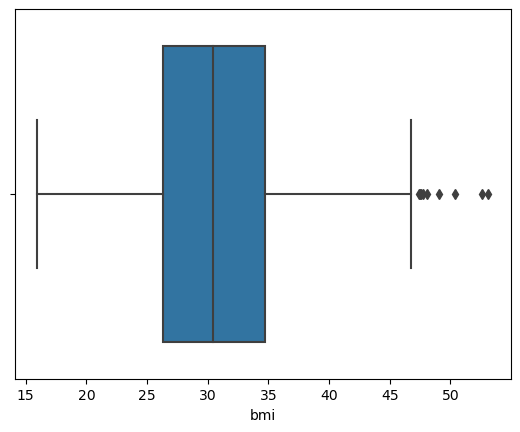

In [11]:
sns.boxplot(df.bmi)

In [12]:
mean = df.bmi.mean()
Q1 = np.percentile(df.bmi, 25)
Q2 = np.median(df.bmi)
Q3 = np.percentile(df.bmi, 75)
IQR = Q3 - Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

print("The lower fence is = "+str(lower_fence))
print("The upper fence is = "+str(upper_fence))


The lower fence is = 13.7
The upper fence is = 47.290000000000006


In [13]:
df1 = df.loc[(df.bmi<=upper_fence) & (df.bmi>=lower_fence)]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

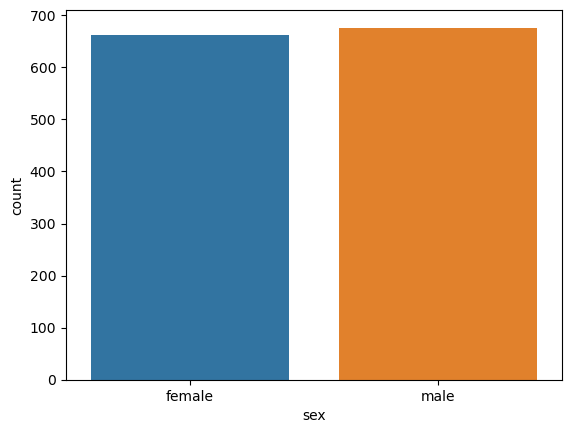

In [15]:
sns.countplot(x = 'sex' , data = df)

<AxesSubplot:xlabel='region', ylabel='count'>

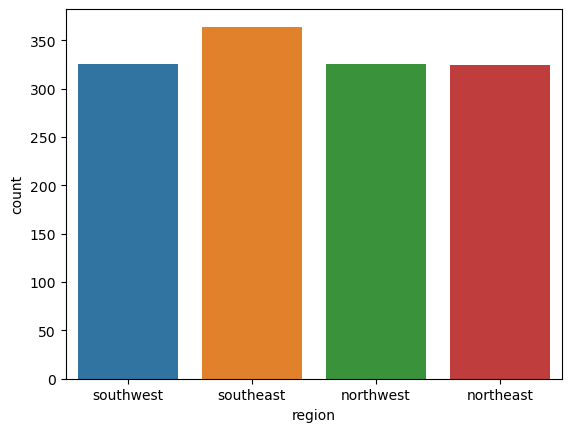

In [16]:
sns.countplot(x = 'region' , data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

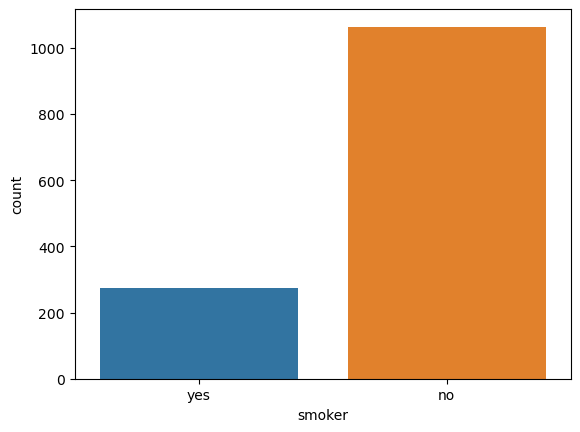

In [17]:
sns.countplot(x = 'smoker' , data = df)

In [18]:
df_dummies1 = pd.get_dummies(df['sex'])

In [19]:
df_dummies1

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [20]:
df_dummies2 = pd.get_dummies(df['smoker'])
df_dummies2

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [21]:
df_dummies3 = pd.get_dummies(df['region'])
df_dummies3

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [22]:
df_combined = pd.concat([df, df_dummies1,df_dummies2,df_dummies3], axis=1)
df_combined

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [23]:
x = df_combined.drop(['sex','smoker','region','charges'], axis = 1)
x

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [24]:
y=df_combined.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((936, 11), (936,), (402, 11), (402,))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()
lm

LinearRegression()

In [28]:
lm.fit(x_train,y_train)

LinearRegression()

In [29]:
print(lm.intercept_)

911.3340121409765


In [30]:
print(lm.coef_)

[ 2.60023521e+02  2.89695143e+02  4.72426567e+02  3.10343993e-02
 -3.10343993e-02 -1.19951619e+04  1.19951619e+04  8.24631478e+02
  6.92229126e+01 -1.16771744e+02 -7.77082646e+02]


In [31]:
y_pred = lm.predict(x_test)
print(y_pred)

[ 4085.11236217  4331.24868127  8435.08323426  3113.71105044
 25704.59491992 38148.78346398 15427.21812972  3604.32111496
 29904.63305651 15965.29837829 15259.2146051   5109.32048095
 11834.16565373  5103.13503246  9061.33678456 31650.89816523
 11890.77782425 12483.68094614  6548.01012003 18093.17728684
 14190.19308297  2609.07134876  6878.65613954 32724.88631959
 13814.59967846 33300.25057272  7286.77856257 40605.57750047
 32257.08438276 13588.56840142 18226.03528419  3280.17976442
 40195.61461333 27603.54658234  8146.73720461 12114.06919535
  8321.36395972 33731.96704637  4917.11655255 38736.14831275
  7526.71670337 13105.90088077  5571.14294147  8416.54680132
  1686.81221808  5501.06458755  5670.580506    4042.93516359
  3094.89202788 11049.60572327 17194.50875512  7225.29879065
  6027.54506919  9174.89920491  6861.82209038 13543.95038238
 12850.72629425 32266.72321114  8287.76524204 12660.60272789
  3732.50054519  4268.08446186  6084.98433655 10298.77023406
 14332.81415376  3112.19

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared


0.7772310511733103

In [33]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 32345536.74852546
Root_Mean_Squared_Error : 5687.313667147739
r_square_value : 0.7772310511733103


In [34]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
12,1826.84300,4085.112362
306,20177.67113,4331.248681
318,7421.19455,8435.083234
815,1877.92940,3113.711050
157,15518.18025,25704.594920
...,...,...
710,1727.54000,4149.488342
1005,4433.38770,6662.926147
389,4618.07990,5394.960561
923,4320.41085,8201.595276


# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge()

In [37]:
ridge

Ridge()

In [38]:
ridge.fit(x_train,y_train)

Ridge()

In [39]:
print(ridge.coef_)

[ 2.60000270e+02  2.89574171e+02  4.72260315e+02 -2.01495427e+00
  2.01495427e+00 -1.19538764e+04  1.19538764e+04  8.19705800e+02
  6.63381961e+01 -1.11213032e+02 -7.74830964e+02]


In [40]:
print(ridge.intercept_)

890.6583760907979


In [41]:
ridge_pred = ridge.predict(x_test)

In [42]:
ridge_pred

array([ 4105.32364658,  4347.75393648,  8446.3950379 ,  3133.56279802,
       25636.29014666, 38075.03012583, 15439.42718781,  3618.11604998,
       29846.09303224, 15979.00825789, 15280.42149086,  5128.79657322,
       11846.62617871,  5116.58335798,  9081.37837784, 31587.79017189,
       11909.86565218, 12498.66689797,  6568.24793155, 18114.10836678,
       14212.49799424,  2629.72834279,  6894.79516408, 32655.75997286,
       13824.32444886, 33225.82234891,  7299.5710257 , 40530.65860926,
       32185.87227694, 13607.62990454, 18242.46207841,  3289.87072202,
       40120.69625472, 27534.44883749,  8166.76509249, 12129.58897319,
        8344.01735907, 33661.96247998,  4931.06920959, 38672.16339189,
        7543.22184719, 13113.39707565,  5594.65777104,  8435.18485886,
        1696.99787899,  5520.94338252,  5690.55917513,  4058.15609917,
        3108.61267456, 11067.76485146, 17216.24175776,  7242.24009852,
        6040.33585166,  9188.15989987,  6878.43422218, 13558.96679419,
      

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, ridge_pred)
r_squared = r2_score(y_test, ridge_pred)
r_squared


0.7773457173770943

In [44]:
#adjusted r square
1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7710657247902944

In [45]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 32328887.480627723
Root_Mean_Squared_Error : 5685.849758886328
r_square_value : 0.7773457173770943


# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso()

In [48]:
lasso

Lasso()

In [49]:
lasso.fit(x_train,y_train)

Lasso()

In [50]:
print(lasso.coef_)

[   260.02779471    289.49794646    471.79548481     -0.
      0.         -23983.34349325      0.            932.20355757
    177.00996518     -0.           -660.67566858]


In [51]:
print(lasso.intercept_)

12795.112230441582


In [52]:
lasso_pred = lasso.predict(x_test)

In [53]:
lasso_pred

array([ 4090.4617053 ,  4336.65581789,  8433.17239964,  3119.93002715,
       25695.92689502, 38139.73988971, 15423.99062645,  3601.27158502,
       29903.94626577, 15961.40536501, 15261.81298936,  5114.77790429,
       11830.35536111,  5100.40934485,  9066.97729862, 31647.66462415,
       11897.18549911, 12486.41692571,  6553.54873544, 18096.15008393,
       14195.27883692,  2615.06289255,  6878.04807003, 32715.17110824,
       13809.67689907, 33288.39717939,  7283.1102796 , 40594.18953228,
       32247.50761547, 13595.27056747, 18226.2204834 ,  3277.72657793,
       40184.14316251, 27593.58593409,  8151.78442594, 12112.85077439,
        8325.60332451, 33720.96944618,  4915.42385305, 38733.97272045,
        7533.15853947, 13100.43779504,  5577.02007234,  8420.53112181,
        1685.08109686,  5507.83375913,  5677.59683333,  4039.41605708,
        3091.95494875, 11053.86689309, 17198.99964383,  7232.98039411,
        6021.7362708 ,  9171.86449362,  6868.35397682, 13548.47154064,
      

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, lasso_pred)
r_squared = r2_score(y_test, lasso_pred)
r_squared

0.7772456495092928

In [55]:
#adjusted r square
1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7709628344954522

In [56]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 32343417.103864565
Root_Mean_Squared_Error : 5687.127315601838
r_square_value : 0.7772456495092928


# Elastic Net Regression

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
elastic = ElasticNet()

In [59]:
elastic

ElasticNet()

In [60]:
elastic.fit(x_train,y_train)

ElasticNet()

In [61]:
print(elastic.coef_)

[  254.38429636   285.63946005   372.72097142  -183.54823452
   183.54300353 -4605.27903975  4605.27837819   196.08400146
  -127.94560846   261.71067425  -329.84886959]


In [62]:
print(elastic.intercept_)

-3170.6646293697104


In [63]:
elastic_pred = elastic.predict(x_test)

In [64]:
elastic_pred

array([ 7754.58670674,  7433.94661896, 11001.97440065,  6376.12211091,
       13584.13149499, 25396.99880798, 17808.58770119,  6044.98340119,
       18501.05378482, 18759.9382804 , 18571.6800504 ,  8240.70694835,
       14202.72973505,  7701.00182771, 12524.07646578, 20288.37541246,
       14962.3475058 , 15150.99338092, 10065.92534023, 21437.07110737,
       17594.72483896,  6303.20789586,  9832.49052055, 20271.98205814,
       16106.00254494, 20587.21890484,  9848.07790072, 27730.30431883,
       19862.38125523, 16620.37778938, 20747.45179558,  5546.40988249,
       27330.07872093, 15456.49815562, 11539.1841174 , 14865.53607249,
       11764.94010452, 21368.05022413,  7507.59287943, 26694.71382523,
       10645.78730715, 15097.50420277,  9152.31023557, 11396.54732213,
        3979.34709029,  8706.06583326,  8869.21067931,  6993.35093283,
        5641.77475573, 14162.9357586 , 20540.98908737, 10433.685141  ,
        8157.00645952, 11495.59661948,  9994.19898441, 16554.79346392,
      

In [65]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 32343417.103864565
Root_Mean_Squared_Error : 5687.127315601838
r_square_value : 0.7772456495092928


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, elastic_pred)
r_squared = r2_score(y_test, elastic_pred)
r_squared

0.5333344392184224

In [67]:
#adjusted r square
1-(1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5201720772476599